In [119]:
try:
    import pandas
    print ("Pandas is already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} pandas
    import pandas
    print ("Pandas was not found. Installed and imported")

import requests
import copy
import numpy as np
import scipy
import matplotlib.pyplot as plt
from collections import Counter

Pandas is already installed and imported


In [120]:
#Function to be used later
def isNaN(num):
    return num != num

#Open excel file
telcoChurn = pandas.read_excel('Telco_customer_churn.xlsx')

#See how many duplicates exist and delete them.
number_of_duplicates = telcoChurn.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")
telcoFinal = telcoChurn.drop_duplicates()
print()

#See if there are any null entities and remove them.
telcoFinal.info()
telcoFinal = telcoFinal.dropna()

 Number of duplicates before : 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   obj

In [121]:
#Print DataFrame
telcoFinal = pandas.DataFrame(telcoChurn)
telcoFinal

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [123]:
columnNames = telcoFinal.columns
print(columnNames)

#Access column data for data we'll be using
gender = telcoFinal['Gender']
country = telcoFinal['Country']
dependents = telcoFinal['Dependents']
tenureMonths = telcoFinal['Tenure Months']
techSupport = telcoFinal['Tech Support']
churnScore = telcoFinal['Churn Score']
churnReason = telcoFinal['Churn Reason']

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


0        2
1        2
2        8
3       28
4       49
        ..
7038    72
7039    24
7040    72
7041    11
7042    66
Name: Tenure Months, Length: 7043, dtype: int64




Text(0.5, 1.0, 'Frequency of tenure month')

<Figure size 2000x1600 with 0 Axes>

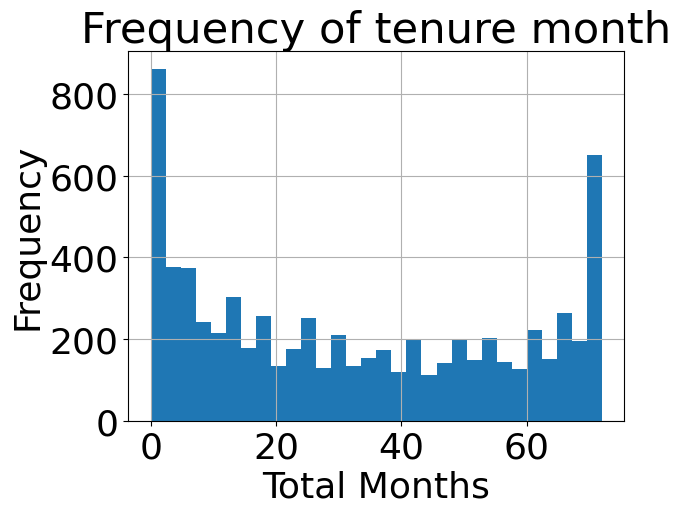

In [125]:
plt.figure(figsize=(20,16))

#Describe tenureMonths
print(tenureMonths)
print('\n')
tenureMonths.describe()

#Graph
fig, ax = plt.subplots()

tenureMonths.hist(bins=30)
plt.xlabel("Total Months")
plt.ylabel("Frequency")
ax.set_title("Frequency of tenure month")

<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Churn Score Histogram')

<Figure size 2000x1600 with 0 Axes>

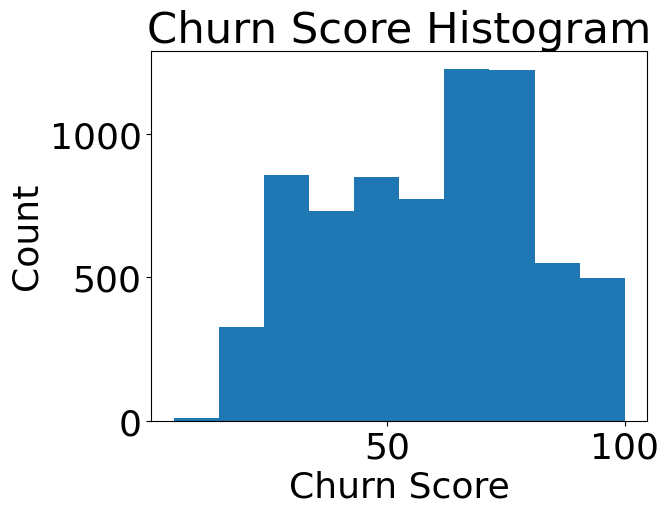

In [126]:
plt.figure(figsize=(20,16))

#Graph
fig, ax = plt.subplots()
print(type(churnScore))

churnScore.plot(kind='hist')
plt.xlabel("Churn Score")
plt.ylabel("Count")
ax.set_title("Churn Score Histogram")

[86, 67, 86, 84, 89, 78, 100, 92, 77, 97, 74, 66, 65, 70, 90, 82, 69, 81, 96, 87, 70, 86, 66, 88, 86, 75, 67, 87, 76, 95, 99, 80, 76, 76, 66, 73, 94, 86, 75, 100, 83, 80, 99, 81, 95, 86, 73, 94, 94, 98, 71, 76, 67, 82, 81, 66, 81, 85, 86, 77, 75, 65, 99, 96, 84, 83, 81, 73, 69, 80, 65, 68, 97, 80, 83, 98, 80, 85, 69, 69, 81, 73, 83, 73, 67, 92, 81, 91, 98, 76, 73, 97, 85, 91, 98, 73, 66, 76, 81, 80, 100, 94, 80, 92, 95, 73, 88, 67, 82, 68, 84, 73, 98, 84, 98, 91, 71, 80, 77, 66, 73, 65, 65, 93, 77, 66, 89, 76, 87, 72, 98, 82, 88, 99, 81, 72, 80, 85, 74, 98, 92, 72, 67, 72, 87, 74, 66, 67, 91, 83, 76, 100, 96, 65, 89, 91, 75, 65, 99, 84, 95, 80, 87, 94, 83, 68, 93, 80, 78, 78, 90, 65, 88, 89, 69, 86, 85, 66, 74, 67, 96, 97, 73, 80, 92, 96, 82, 66, 77, 100, 79, 76, 97, 81, 71, 81, 92, 74, 75, 70, 76, 74, 80, 95, 89, 73, 83, 76, 82, 72, 89, 83, 94, 80, 91, 85, 95, 77, 85, 86, 80, 67, 84, 76, 97, 79, 100, 76, 71, 81, 93, 70, 99, 94, 91, 79, 83, 99, 97, 82, 84, 74, 72, 74, 82, 83, 72, 96, 8

Text(0.5, 1.0, 'Churn Score in Relation to Tenure Average')

<Figure size 500x500 with 0 Axes>

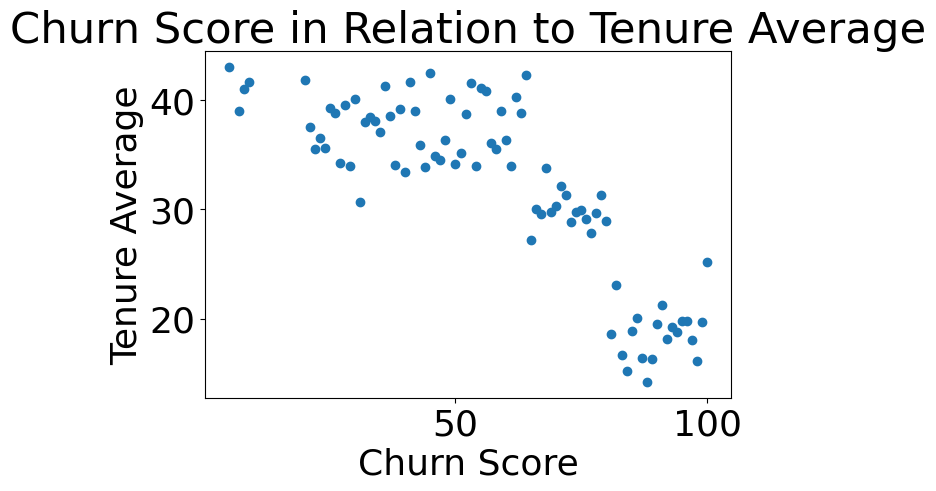

In [127]:
churnTenure = {}
for g in churnScore.unique():
    churnTenure[g] = tenureMonths[churnScore == g].mean()

plt.figure(figsize=(5,5))
fig, ax = plt.subplots(layout='constrained')

print(churnList)
print(tenureFinal)

plt.scatter(churnTenure.keys(), churnTenure.values())
ax.set_ylabel('Tenure Average')
ax.set_xlabel('Churn Score')
ax.set_title('Churn Score in Relation to Tenure Average')

0         Male
1       Female
2       Female
3       Female
4         Male
         ...  
7038    Female
7039      Male
7040    Female
7041    Female
7042      Male
Name: Gender, Length: 7043, dtype: object
0                        No
1                        No
2                        No
3                       Yes
4                        No
               ...         
7038    No internet service
7039                    Yes
7040                     No
7041                     No
7042                    Yes
Name: Tech Support, Length: 7043, dtype: object




<Figure size 2000x3000 with 0 Axes>

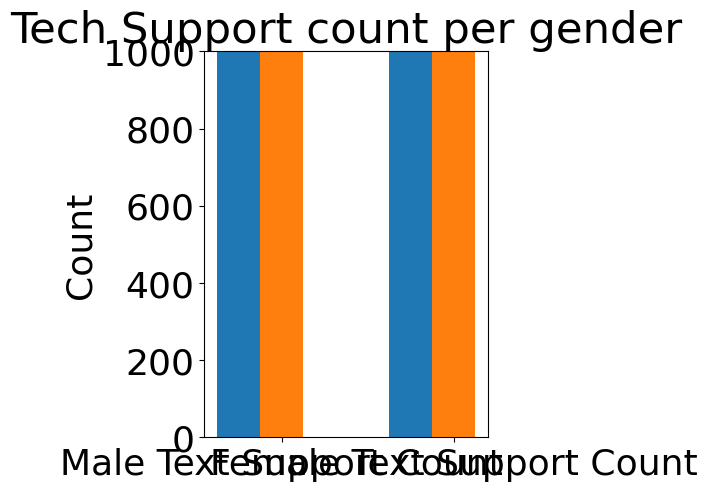

In [128]:
plt.figure(figsize=(20,30))

#Describe gender & tech support
print(gender)
print(techSupport)
print('\n')
gender.describe()

#Make list for gender
maleCountY = 0
maleCountN = 0
femaleCountY = 0
femaleCountN = 0

for i in range(len(gender)):
  if gender[i] == 'Male':
    if techSupport[i] == 'Yes':
      maleCountY += 1
    else:
      maleCountN += 1
  else:
    if techSupport[i] == 'Yes':
      femaleCountY += 1
    else:
      femaleCountN += 1

genderCount = {
    'Male Text Support Count': (maleCountY, femaleCountY),
    'Female Text Support Count': (maleCountN, femaleCountN)
}

genderLabels = ["Yes Tech Support", "No Tech Support"]

x = np.arange(len(genderLabels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in genderCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Tech Support count per gender')
ax.set_xticks(x + width, genderCount)
ax.set_ylim(0, 1000)

plt.show()

0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                              NaN
7039                              NaN
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object




<Figure size 2000x3000 with 0 Axes>

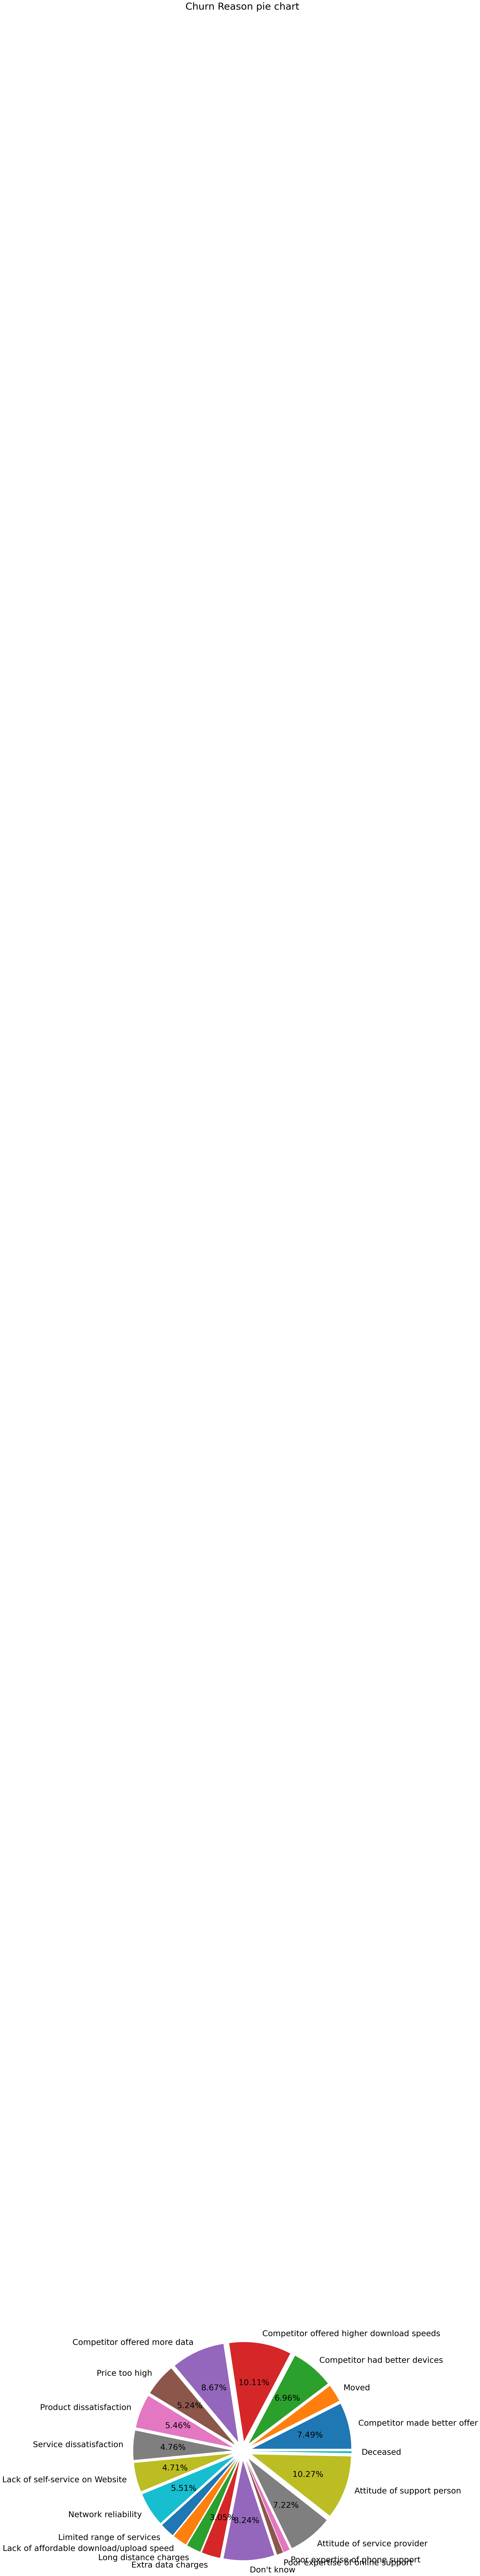

In [129]:
#Makes the pie chart more readable by not displaying percentages under a certain threshold
percentage_threshold = 3.0
def autopct_func(pct):
  if pct >= percentage_threshold:
    return f'{pct:.2f}%'
  else:
    return ''

#Describe churn reason
print(churnReason)
print('\n')
churnReason.describe()

#Make list for churn reasons
reasonList = {}
reasonFinal = []
explode = []

for i in range(len(churnReason)):
  if isNaN(churnReason[i]):
    pass
  elif churnReason[i] not in reasonList.keys():
    reasonList[churnReason[i]] = 1
  else:
    reasonList[churnReason[i]] += 1

for i in reasonList.keys():
  explode.append(0.3)
  reasonFinal.append(reasonList[i])

reasonLabels = reasonList.keys()

#Graph reason pie
plt.figure(figsize=(20,30))

fig, ax = plt.subplots()
ax.set_title('Churn Reason pie chart', y = 30)
plt.pie(reasonFinal,labels = reasonLabels,autopct=autopct_func, explode = explode,radius = 3)
plt.rc('font', size=26)